In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

%matplotlib inline

In [2]:
filename = 'data/VC-MODELO.csv'
afp_name = filename.split('-')[1].split('.')[0]
karg_csv = dict(delimiter=';', decimal=',', index_col=0, parse_dates=True)
afp = pd.read_csv(filename, **karg_csv)
#afp.dropna(inplace=True)

In [3]:
# Tamagno grafos
figsize = (15,5)

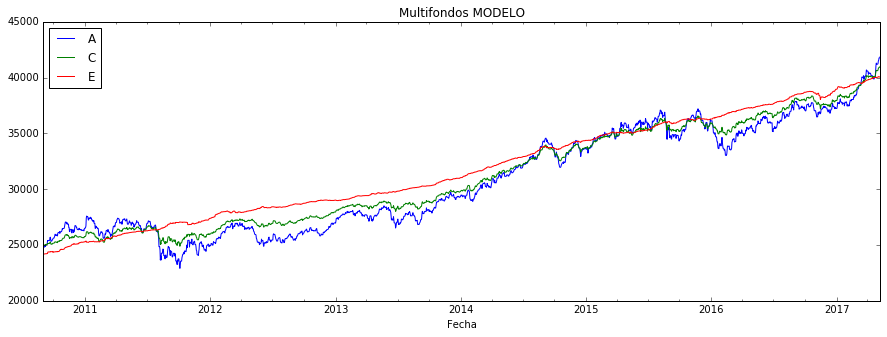

In [4]:
afp.loc[:,['A','C','E']].plot(title='Multifondos %s'%(afp_name), figsize=figsize)

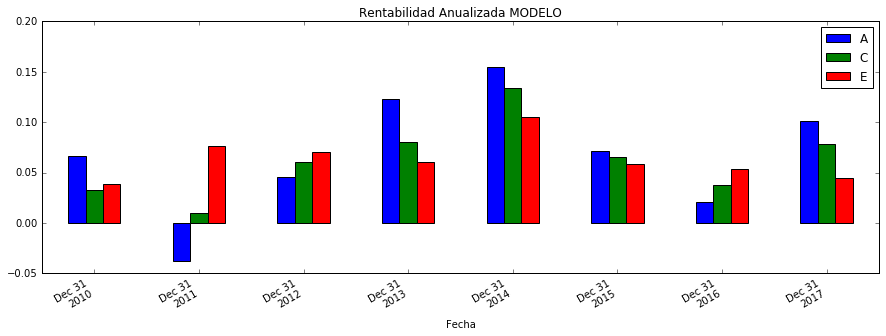

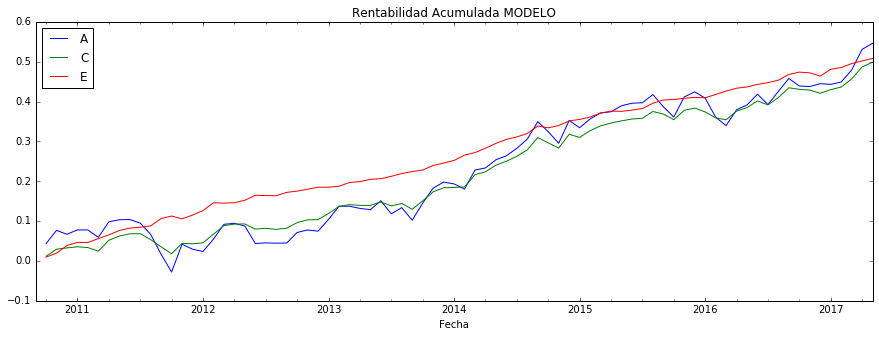

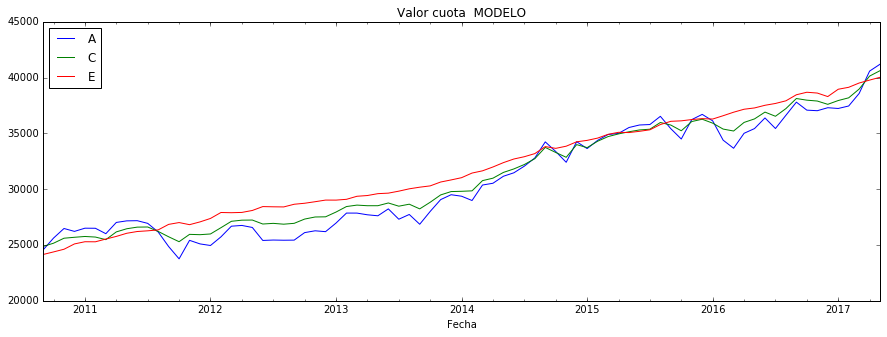

In [5]:
# Grafico rentabilidad, rentabilidad acumulada y valor cuota promedio periodo
# Periodos : W week, , M month, Q quarter, A year
period = 'M'
# Valor cuota inicio del periodo
df = afp.dropna().loc[:,['A','C','E']].resample(period).first()
# Rentabilidad anualizada es suma de rentabilidades mensuales
aux = df.pct_change(1).resample('A').sum()
# Grafo rentabilidad anualizada
ax = aux.plot(title='Rentabilidad Anualizada %s'%(afp_name), kind='bar', figsize=figsize)
# Fix date format on bar plot with pandas
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(aux.index)
show = 7; step = int(len(aux.index)/show)
# Every step ticklable shows the month, day and year
ticklabels[::step] = [item.strftime('%b %d\n%Y') for item in aux.index[::step]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
# Grafo rentabilidad acumulada
df.pct_change().cumsum().plot(title='Rentabilidad Acumulada %s'%(afp_name), figsize=figsize)
# Grafo valor cuota inicio del periodo
df.plot(title='Valor cuota  %s'%(afp_name), figsize=figsize)

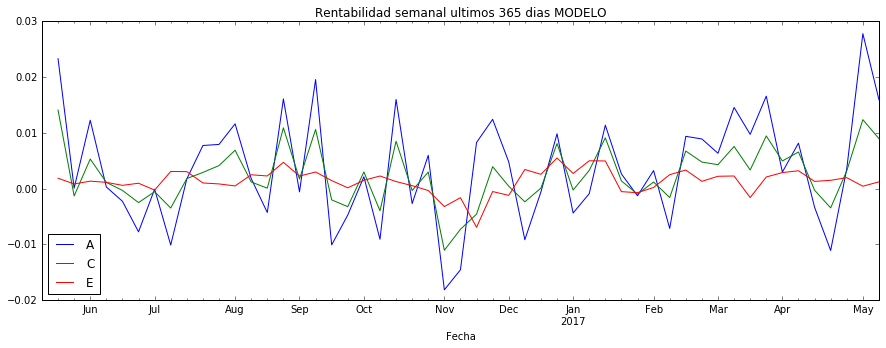

In [6]:
afp.ix[-365:,['A','C','E']].resample('W').first().pct_change(1).plot(
                        title='Rentabilidad semanal ultimos 365 dias %s'%(afp_name), figsize=figsize)

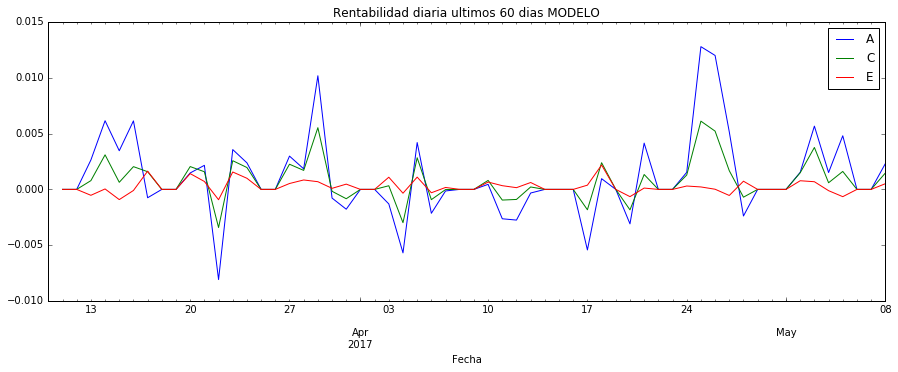

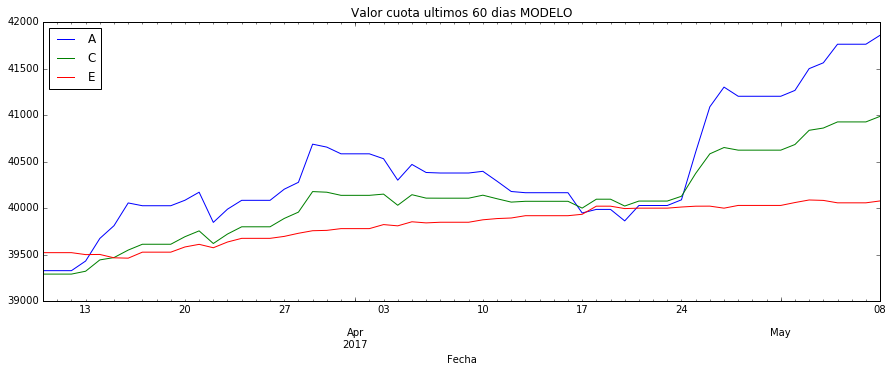

In [7]:
afp.ix[-60:,['A','C','E']].pct_change().plot(title='Rentabilidad diaria ultimos 60 dias %s'%(afp_name), figsize=figsize)
afp.ix[-60:,['A','C','E']].plot(title='Valor cuota ultimos 60 dias %s'%(afp_name), figsize=figsize)

In [8]:
#%qtconsole